In [33]:
import pandas as pd
import mpmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Month,Posts Total,Posts Growth,Views,Views Growth
0,2016 10,0,0,2,236
1,2016 11,4,4,218,454
2,2016 12,2,6,191,645
3,2017 01,0,6,3,648
4,2017 02,0,6,16,664
...,...,...,...,...,...
79,2023 05,25,1975,6195,1329937
80,2023 06,11,1986,9585,1339522
81,2023 07,18,2004,27490,1367012
82,2023 08,5,2009,9533,1376545


In [6]:
df.tail(12)

,Month,Posts Total,Posts Growth,Views,Views Growth
72,2022 10,43,1830,11618,1284217
73,2022 11,19,1849,6745,1290962
74,2022 12,5,1854,6963,1297925
75,2023 01,32,1886,10580,1308505
76,2023 02,39,1925,6084,1314589
77,2023 03,9,1934,4154,1318743
78,2023 04,16,1950,4999,1323742
79,2023 05,25,1975,6195,1329937
80,2023 06,11,1986,9585,1339522
81,2023 07,18,2004,27490,1367012


In [63]:
df['views_k'] = df['Views'].values / 1000
df['views_k'] = df['views_k'].apply(round)

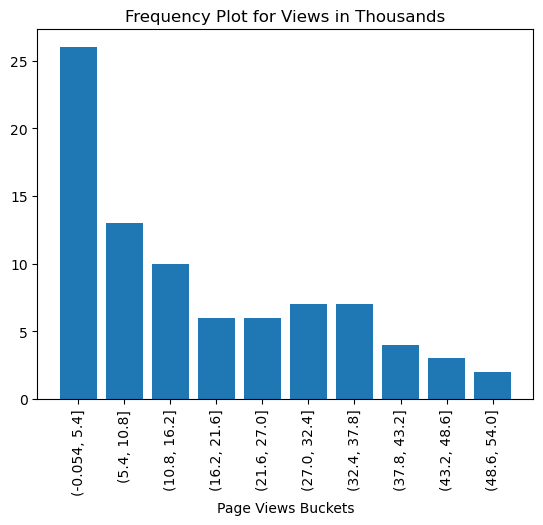

In [60]:
bins = pd.cut(df['views_k'], 10) # Equal frequency binning
df['Bins'] = bins
df_rep = df.groupby(by = ['Bins'])['Bins'].count()

plt.title("Frequency Plot for Views in Thousands")
plt.xlabel("Page Views Buckets")
plt.xticks(rotation=90)
plt.bar(df_rep.index.astype(str), df_rep.values)
plt.show() 

In [19]:
lm = df['views_k'].mean()

In [20]:
lm

16.702380952380953

In [28]:
k_list = np.arange(4, 20, 1)

In [31]:
import math
def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / math.factorial(k)
    
    # Below equation is for Zero inflated model
    # exp⁡ [ k ln λ − λ − ln ⁡ Γ ( k + 1 ) ]
    # ret = mpmath.exp(k * math.log(lm) - lm - mpmath.log(mpmath.gamma(k + 1)))
    
    return ret

In [32]:
for i in k_list:
    print(str(i) + " " + str(round(get_poisson_probability(lm, i), 5)))

4 0.00018
5 0.0006
6 0.00168
7 0.00401
8 0.00837
9 0.01554
10 0.02596
11 0.03941
12 0.05486
13 0.07048
14 0.08409
15 0.09363
16 0.09774
17 0.09603
18 0.08911
19 0.07833


In [34]:
kl = []
pl = []

for i in k_list:
    kl.append(i)
    pl.append(get_poisson_probability(lm, i))

df_report = pd.DataFrame({
    'k': kl,
    'probability': pl
})

df_report

,k,probability
0,4,0.000181
1,5,0.000604
2,6,0.001681
3,7,0.004011
4,8,0.008374
5,9,0.015541
6,10,0.025958
7,11,0.039414
8,12,0.054859
9,13,0.070483


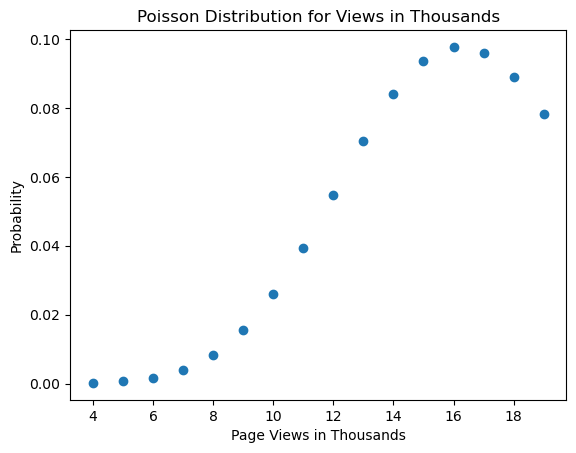

In [64]:
plt.title("Poisson Distribution for Views in Thousands")
plt.xlabel("Page Views in Thousands")
plt.ylabel("Probability")

#plt.xticks(rotation=90)

plt.scatter(df_report['k'], df_report['probability'])
plt.show()